The quality of the data is an important attribute that could drive the value of the data and, hence, impact aspects of the business outcome. The tables contain some noteworthy quality problems which if could be fixed, can help analyst to extract useful insight more easily and efficiently. 

We imported the tables into jupyter notebook and tried to study them from different aspects.

In [12]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#import data
brands = pd.read_csv(r"D:\takehome chanllenge\Takehome_Data_January_2023\brands.csv")
items = pd.read_csv(r"D:\takehome chanllenge\Takehome_Data_January_2023\receipt_items.csv")
receipt = pd.read_csv(r"D:\takehome chanllenge\Takehome_Data_January_2023\receipts.csv")
users = pd.read_csv(r"D:\takehome chanllenge\Takehome_Data_January_2023\users.csv")

## 1. Completeness

In [20]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

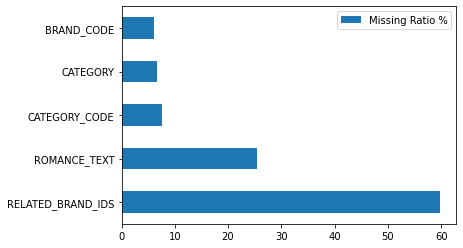

In [19]:
plot_nas(brands)

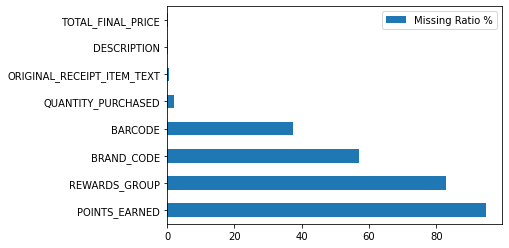

In [21]:
plot_nas(items)

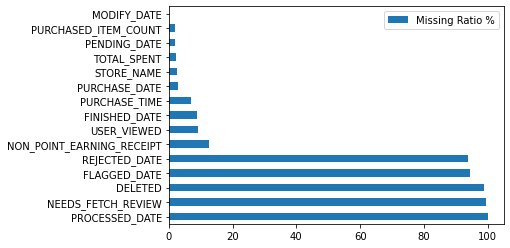

In [22]:
plot_nas(receipt)

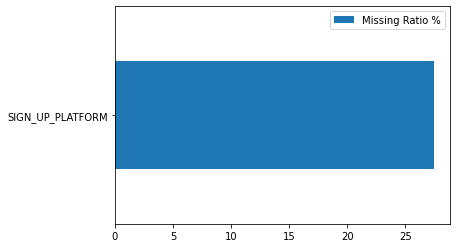

In [23]:
plot_nas(users)

I wrote a plot_nas function which can plot the percentage of missing values in each column of each one of the tables. From the plots, we can observe that each table contains certain number of missing values, and the missing percentages of some columns are pretty high. Typical examples are the `related_brand_IDs` column in the `brands` table whose around 60% value is missing, the `rewards_group` and `points_earned` columns in the `receipt_items` table miss their 80% values, and more extremely, the `needs_fetch_review` and `processed_date` columns in the `receipt` table are almost empty. 

The missing values are likely to bring confusion in the analysis process. To deal with them, I would recommend first looking for the reason of missing, is there something wrong happened in data collection, or these data are just very rare and hardly recorded? Based on the interest of data analysis, we may choose to collect the data again, use some reasonable value to replace these missing values, or simply drop them.

## 2. Consistency

In order to better answer business problems, we want to join information from all the tables and come up with a comprehensive understanding of business. However, there exist records that can not be matched. For example, some of the brands appearing in the `receipt_items` table can not be found in the `brands` table or are written in a different way which increases the difficulty of detecting them.

In [35]:
brands_in_receipt = list(items['BRAND_CODE'])
brand = list(brands['BRAND_CODE'])

In [41]:
len(pd.unique(brand))

381

In [42]:
len(pd.unique(brands_in_receipt))

8721

I listed the number of unique brands (including nan, which is an empty value) in two tables and found that there are 381 unique brands in `brands` table while there are 8721 unique brands in `receipt_items` table, a huge difference.

As mentioned above, the difference might be due to a non-existing brand, or one brand written as its specific product. We can visualize one of these examples. Let's see how many `CHEX MIX` products we have on the table.

In [76]:
for i in range(len(brands_in_receipt)):
    brands_in_receipt[i] = str(brands_in_receipt[i])
new_brands_in_receipt = pd.unique(brands_in_receipt)

In [77]:
import re
pattern = re.compile(r'^CHEX MIX.*')
matches = [x for x in new_brands_in_receipt if pattern.match(x)]

In [78]:
matches

['CHEX MIX', 'CHEX MIX MUDDY BUDDIES', 'CHEX MIX SWEET BARS']

These brands come from the same product group of `CHEX MIX`; however, if we don't apply some strategy to group them together, they are likely to be treated as different groups and create an incorrect result when we try to join the tables together since the `brand` table only contains `CHEX MIX.`

## 3. Accuracy

Some of the values are unrealistic and need to be double-checked. For instance, when I look for the most expensive item, I order the records based on the final prices, but the highest final price is too high to be true for its corresponding item. 

In [98]:
items[pd.notnull(items['TOTAL_FINAL_PRICE'])].sort_values('TOTAL_FINAL_PRICE').tail(5)[['DESCRIPTION','TOTAL_FINAL_PRICE']]

,DESCRIPTION,TOTAL_FINAL_PRICE
261104,Fresh Iceberg Lettuce,31001.50
261102,Papaya,31003.00
93589,Tomatoes on the Vine,31003.84
193562,Starbucks Iced Coffee Premium Coffee Beverage ...,31005.99
276511,Starbucks Iced Coffee Premium Coffee Beverage ...,31005.99


Obviously, it's impossible for a Starbucks Iced Coffee or tomatoes to be sold at a price over $31000.

If we visualize the distribution of final prices, we can easily observe outliers. From the boxplot where the y-axis is the actual value, we can see that there is a point high above all other points.

<AxesSubplot:>

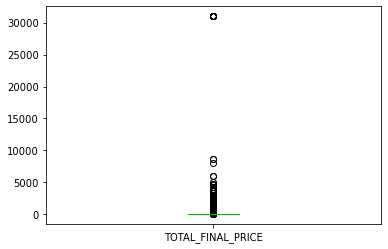

In [104]:
items['TOTAL_FINAL_PRICE'].plot.box()

Not all outliers should be dropped. However, the outliers in the `total_final_price` are meaningless, they may be due to typos or mistakes in data collection, but I would suggest removing them since they don't contain much useful information.